In [2]:
import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.dirname(os.path.abspath(current_dir)))
from Backend.fake_backend import FakeBackend
from Backend.backend import Backend

from Result.result import ResultData

from qiskit.visualization import plot_histogram
from qiskit import transpile
from qiskit_aer import Aer

from itertools import permutations

import bit_functions
from qiskit import QuantumCircuit

from shor_algo_adder_method import c_mult_a_mod_n, set_start_state

from SaveData.save_data_to_file import CSVWriter

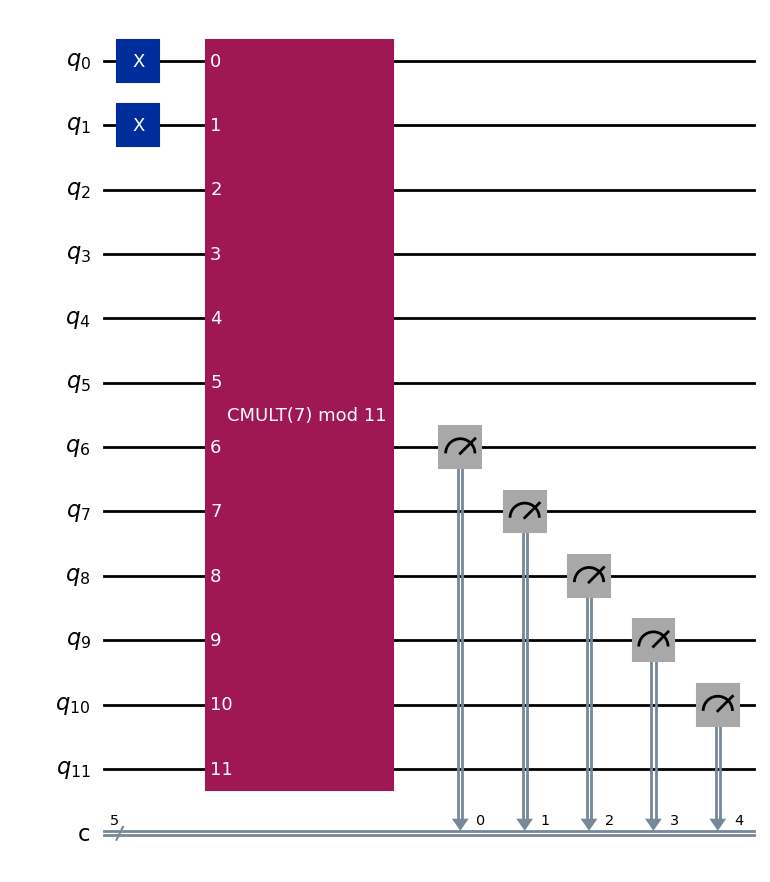

In [10]:
N = 11
a = 7
x = 1
b = 0

n = bit_functions.bit_length(N)
qc = QuantumCircuit(2*n + 4, n + 1)
qc.x(0)
set_start_state(qc, x, 1)
set_start_state(qc, b, n+2)

qc.append(c_mult_a_mod_n(a, N), range(2*n + 4))

qc.measure(range(n+2, 2*n+3), range(n+1))

qc.draw("mpl")

ERROR:stevedore.extension:Could not load 'noise_adaptive': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'NoiseAdaptiveLayoutPassManager'
ERROR:stevedore.extension:Could not load 'unroller': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'UnrollerPassManager'


ERROR:stevedore.extension:Could not load 'noise_adaptive': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'NoiseAdaptiveLayoutPassManager'
ERROR:stevedore.extension:Could not load 'unroller': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'UnrollerPassManager'


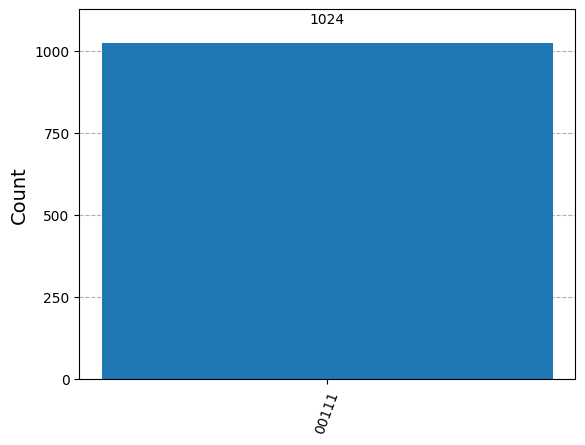

In [11]:
aer_sim = Aer.get_backend('aer_simulator')
t_subtract = transpile(qc, aer_sim)

counts_subtract = aer_sim.run(t_subtract).result().get_counts()
plot_histogram(counts_subtract)

In [5]:
generic_backend = Backend(n)
backend_names = FakeBackend.get_ibm_fake_backend_names_with_limit(n)
fake_auckland_backend = FakeBackend.get_ibm_fake_backend('fake_auckland')
fake_backend_name = 'fake_auckland'
fake_backend = FakeBackend(fake_backend_name)

In [30]:
transpiled_circuit = transpile(qc, fake_backend.get_backend(), optimization_level=0)
# transpiled_circuit.draw('mpl')

In [ ]:
layoutlist = list(permutations(range(2*n + 4), 2*n + 4))
print(layoutlist)
len(layoutlist)

: 

: 

In [6]:
layoutlist = list(permutations(range(n), n))

for i, lst in enumerate(layoutlist):
    lst = list(lst)
    lst.extend(range(n, 2*n+4))
    layoutlist[i] = lst

print(layoutlist)
len(layoutlist)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [0, 1, 3, 2, 4, 5, 6, 7, 8, 9, 10, 11], [0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11], [0, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11], [0, 3, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11], [0, 3, 2, 1, 4, 5, 6, 7, 8, 9, 10, 11], [1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [1, 0, 3, 2, 4, 5, 6, 7, 8, 9, 10, 11], [1, 2, 0, 3, 4, 5, 6, 7, 8, 9, 10, 11], [1, 2, 3, 0, 4, 5, 6, 7, 8, 9, 10, 11], [1, 3, 0, 2, 4, 5, 6, 7, 8, 9, 10, 11], [1, 3, 2, 0, 4, 5, 6, 7, 8, 9, 10, 11], [2, 0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11], [2, 0, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11], [2, 1, 0, 3, 4, 5, 6, 7, 8, 9, 10, 11], [2, 1, 3, 0, 4, 5, 6, 7, 8, 9, 10, 11], [2, 3, 0, 1, 4, 5, 6, 7, 8, 9, 10, 11], [2, 3, 1, 0, 4, 5, 6, 7, 8, 9, 10, 11], [3, 0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11], [3, 0, 2, 1, 4, 5, 6, 7, 8, 9, 10, 11], [3, 1, 0, 2, 4, 5, 6, 7, 8, 9, 10, 11], [3, 1, 2, 0, 4, 5, 6, 7, 8, 9, 10, 11], [3, 2, 0, 1, 4, 5, 6, 7, 8, 9, 10, 11], [3, 2, 1, 0, 4, 5, 6, 7, 8, 9, 10, 11]]


24

In [16]:
transpile_list = []
for opt_lvl in [0, 3]: #[0, 3]:
    for layout in [None]:
        transpile_list.append(
            fake_backend.transpile_save_param(qc=qc, optimization_level=opt_lvl, initial_layout=layout, seed_transpiler=None, 
                                                 input_a = a, input_x = x, input_b = b, input_n = N))


ERROR:stevedore.extension:Could not load 'noise_adaptive': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'NoiseAdaptiveLayoutPassManager'


ERROR:stevedore.extension:Could not load 'unroller': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'UnrollerPassManager'
ERROR:stevedore.extension:Could not load 'noise_adaptive': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'NoiseAdaptiveLayoutPassManager'
ERROR:stevedore.extension:Could not load 'unroller': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'UnrollerPassManager'
ERROR:stevedore.extension:Could not load 'noise_adaptive': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'NoiseAdaptiveLayoutPassManager'
ERROR:stevedore.extension:Could not load 'unroller': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'UnrollerPassManager'
ERROR:stevedore.extension:Could not load 'noise_adaptive': module 'qiskit.transpiler.preset_passmanagers.builtin_plugins' has no attribute 'NoiseAdaptiveLayoutPassManager'
ERROR:stevedore.ext

In [13]:
len(transpile_list)

5

In [17]:
qc_resultData = []
for qc_tr in transpile_list:
    qc_res  = qc_tr.backend.run(qc_tr.transpiled_qc, shots=1024, seed_simulator=None)
    result = ResultData(qc_res)
    qc_resultData.append(result)

In [18]:
print(qc_resultData)
for res in qc_resultData:
    print(res.to_dict())

[<Result.result.ResultData object at 0x000002BD94A47950>, <Result.result.ResultData object at 0x000002BD973ED010>]
{'seed_simulator': None, 'counts': {'00001': 43, '10000': 39, '11101': 35, '00101': 31, '10100': 47, '00011': 26, '11100': 40, '01000': 41, '10101': 29, '11110': 34, '01010': 40, '10111': 32, '11011': 24, '00110': 22, '01101': 28, '11000': 39, '10001': 25, '11111': 20, '01001': 28, '00010': 43, '00100': 42, '10011': 22, '10110': 18, '11010': 37, '00000': 41, '11001': 33, '01100': 44, '01011': 19, '01110': 35, '01111': 18, '00111': 20, '10010': 29}, 'time_taken': 326.02628660202026, 'result_time_taken': 324.7098557}
{'seed_simulator': None, 'counts': {'10101': 28, '00100': 43, '11110': 19, '10110': 26, '10011': 32, '00101': 34, '01010': 47, '01100': 37, '00010': 38, '01000': 39, '01110': 36, '01011': 25, '10000': 37, '11100': 30, '11111': 22, '11001': 36, '00000': 32, '01001': 39, '11011': 29, '00001': 38, '01101': 30, '00110': 30, '10001': 20, '00011': 28, '11010': 46, '10

In [19]:

excel_name = f"mult_mod_results.csv"

save = CSVWriter(file_name=excel_name)

data = []
for qc_transpile, res_data in zip(transpile_list, qc_resultData):
    data.append([qc_transpile, res_data])  

save.save_data(data)

Data saved to ..\logs\mult_mod_results_2024_08_13_13_18_18.csv


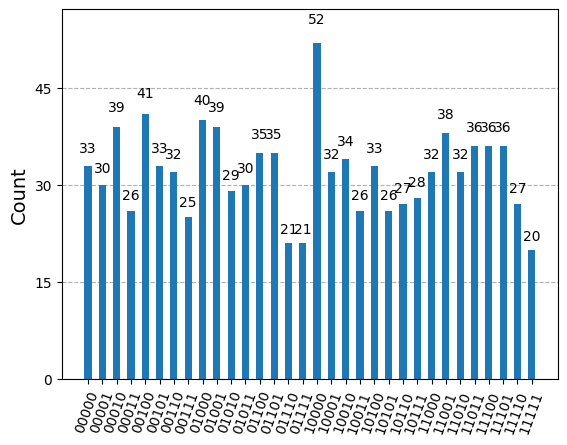

In [20]:
counts = {'01010': 29, '00110': 32, '10010': 34, '11001': 38, '11010': 32, '01000': 40, '00100': 41, '11111': 20, '00000': 33, '11101': 36, '00010': 39, '01100': 35, '10000': 52, '10100': 33, '11110': 27, '10110': 27, '11000': 32, '00101': 33, '00111': 25, '01001': 39, '10011': 26, '00001': 30, '01011': 30, '10111': 28, '01101': 35, '01110': 21, '10001': 32, '11011': 36, '01111': 21, '00011': 26, '11100': 36, '10101': 26}
plot_histogram(counts)